<a href="https://colab.research.google.com/github/RTae/Data-science-essentials/blob/master/week3/DSE_Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Model

##Pipeline
1. get data
2. clean data
3. train & test split
4. extract feature
5. train model
6. evaluation
7. pipeline

# 1. Get Data

In [ ]:
# ติดตั้ง library สำหรับ download google sheet และแปลภาษา
!pip install --upgrade -q pygsheets # ​google sheet
!pip install googletrans # google translate

     |████████████████████████████████| 112kB 4.5MB/s 
     |████████████████████████████████| 61kB 3.6MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 952kB 7.5MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=a46b535174b2e4c3e77ca6ce5cbaef5ce6f14a695837623684516f6618b314c4
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=819da6d4192af8dca94bb01c9bb9ef5589c65da0358406c9623c2b448da25dbd
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


## 1.1. Import all necessary libraries
เนื่องจากว่า data sourch ของเราได้มาจากการทำ survey ด้วย google sheet ดังนั้นเราต้องอิมพอร์ตไลบรารี่ที่ต้องใช้ในการ download ข้อมูลจาก google sheet

In [ ]:
# อิมพอร์ต library ที่ใช้ในคอร์สนี้
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default()) 

ข้อมูลที่ได้จาก google sheet จะถูก transform ให้อยู่ใน Dataframe เนื่องจากข้อมูลที่เป็น Dataframe ช่วยทำให้การวิเคราะห์ และประมวลผลสะดวกรวดเร็ว

In [ ]:
# Download data from google sheet and convert to dataframe
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1P-_6nZBr1YBoHb5ONtuPNDPe4bXKoEeG_c5htMhXPDw/edit#gid=2049680291') # use this when you have the complete url (the edit#gid means permission)
sheet =  spreadsheet.get_worksheet(0)  # 0 means the first sheet in the file

# Create dataframe called 'survey_df' and store dataset
survey_df = pd.DataFrame(sheet.get_all_records())

# Display last 5 row of dataframe
survey_df.tail()

,Timestamp,อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ],อาหารที่ชอบ (ตอบทุกข้อ) [กระเพราหมูกรอบ],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มยำกุ้ง],อาหารที่ชอบ (ตอบทุกข้อ) [ข้าวมันไก่],อาหารที่ชอบ (ตอบทุกข้อ) [ก๋วยเตี๋ยว],อาหารที่ชอบ (ตอบทุกข้อ) [พิซซ่า],อาหารที่ชอบ (ตอบทุกข้อ) [ไก่ บอนชอน],อาหารที่ชอบ (ตอบทุกข้อ) [MK สุกี้],อาหารที่ชอบ (ตอบทุกข้อ) [อาหารทะเล],อาหารที่ชอบ (ตอบทุกข้อ) [สลัด],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มเลือดหมู],อาหารที่ชอบ (ตอบทุกข้อ) [ทุเรียน],อายุ,น้ำหนักตัว (กิโลกรัม),เพศ
263,8/22/2020 14:07:18,ชอบ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,รักเลย,เฉยๆ,เฉยๆ,เกลียด,30,88.0,ชาย
264,8/22/2020 18:16:05,รักเลย,ชอบ,ชอบ,ชอบ,ชอบ,เกลียด,เกลียด,ชอบ,เฉยๆ,รักเลย,ชอบ,ชอบ,24,56.0,ชาย
265,8/22/2020 22:53:24,รักเลย,ชอบ,ชอบ,ชอบ,ชอบ,เกลียด,เกลียด,ชอบ,เฉยๆ,รักเลย,ชอบ,ชอบ,24,56.0,ชาย
266,8/25/2020 15:41:22,เกลียด,เฉยๆ,ชอบ,เฉยๆ,รักเลย,เฉยๆ,รักเลย,รักเลย,รักเลย,เกลียด,ชอบ,ชอบ,28,54.0,หญิง
267,8/25/2020 18:23:41,รักเลย,เฉยๆ,เฉยๆ,ชอบ,เฉยๆ,ไม่ชอบ,เฉยๆ,ชอบ,รักเลย,ชอบ,เกลียด,เกลียด,23,60.0,ชาย


In [ ]:
# Randomly display 20 samples
survey_df.sample(20)

,Timestamp,อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ],อาหารที่ชอบ (ตอบทุกข้อ) [กระเพราหมูกรอบ],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มยำกุ้ง],อาหารที่ชอบ (ตอบทุกข้อ) [ข้าวมันไก่],อาหารที่ชอบ (ตอบทุกข้อ) [ก๋วยเตี๋ยว],อาหารที่ชอบ (ตอบทุกข้อ) [พิซซ่า],อาหารที่ชอบ (ตอบทุกข้อ) [ไก่ บอนชอน],อาหารที่ชอบ (ตอบทุกข้อ) [MK สุกี้],อาหารที่ชอบ (ตอบทุกข้อ) [อาหารทะเล],อาหารที่ชอบ (ตอบทุกข้อ) [สลัด],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มเลือดหมู],อาหารที่ชอบ (ตอบทุกข้อ) [ทุเรียน],อายุ,น้ำหนักตัว (กิโลกรัม),เพศ
30,8/20/2020 20:18:37,เฉยๆ,ชอบ,ชอบ,ชอบ,เฉยๆ,ชอบ,ไม่ชอบ,เฉยๆ,เฉยๆ,เกลียด,เฉยๆ,รักเลย,45,74.0,ชาย
116,8/20/2020 22:14:45,รักเลย,รักเลย,รักเลย,เฉยๆ,เฉยๆ,ชอบ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เกลียด,27,30.0,หญิง
236,8/22/2020 10:19:59,เฉยๆ,ไม่ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,รักเลย,รักเลย,เฉยๆ,เกลียด,เฉยๆ,32,70.0,ชาย
225,8/21/2020 21:14:59,เฉยๆ,ไม่ชอบ,ชอบ,รักเลย,เกลียด,เฉยๆ,รักเลย,ชอบ,รักเลย,ชอบ,เฉยๆ,รักเลย,27,49.0,หญิง
173,8/21/2020 8:34:10,รักเลย,เฉยๆ,ชอบ,ไม่ชอบ,เฉยๆ,ชอบ,ชอบ,รักเลย,รักเลย,รักเลย,รักเลย,ชอบ,27,48.0,หญิง
158,8/21/2020 1:53:49,เฉยๆ,ชอบ,เฉยๆ,ชอบ,เฉยๆ,ไม่ชอบ,ชอบ,ชอบ,เกลียด,เฉยๆ,ชอบ,เฉยๆ,44,52.0,ชาย
21,8/20/2020 19:49:55,ไม่ชอบ,รักเลย,รักเลย,ชอบ,เฉยๆ,รักเลย,ชอบ,ชอบ,ชอบ,ไม่ชอบ,ชอบ,รักเลย,21,65.0,หญิง
14,8/20/2020 19:31:22,เฉยๆ,ชอบ,ชอบ,ชอบ,ไม่ชอบ,เฉยๆ,ชอบ,ชอบ,ชอบ,เฉยๆ,ไม่ชอบ,เฉยๆ,34,58.0,
109,8/20/2020 22:04:31,เฉยๆ,ไม่ชอบ,ชอบ,ชอบ,รักเลย,ชอบ,ชอบ,เฉยๆ,เฉยๆ,ชอบ,รักเลย,ชอบ,47,76.8,ชาย
61,8/20/2020 21:37:04,เฉยๆ,รักเลย,ชอบ,รักเลย,ชอบ,ชอบ,รักเลย,ชอบ,ชอบ,เฉยๆ,รักเลย,เฉยๆ,28,64.0,ชาย


##1.2. สร้าง function เพื่อนำไปใช้ใน pipeline ของเรา
เมื่อเราได้ code เบื้องต้นที่จะนำไปใช้ในสำหรับ download ข้อมูลจาก google sheet เรียบร้อยแล้ว เราก็ทำการแปลงให้เป็น function เพื่อครั้งต่อ ๆ ไป เราจะเรียกใช้งาน function ใน pipeline ของเรา

In [ ]:
# create function called 'load_data()'
def load_data():
  spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1P-_6nZBr1YBoHb5ONtuPNDPe4bXKoEeG_c5htMhXPDw/edit#gid=2049680291') # use this when you have the complete url (the edit#gid means permission)
  sheet =  spreadsheet.get_worksheet(0)  # 0 means the first sheet in the file
  survey_df = pd.DataFrame(sheet.get_all_records())
  return survey_df

ทดสอบการใช้งานฟังก์ชั่น **load_data()**

In [ ]:
survey_df = load_data()

In [ ]:
survey_df

,Timestamp,อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ],อาหารที่ชอบ (ตอบทุกข้อ) [กระเพราหมูกรอบ],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มยำกุ้ง],อาหารที่ชอบ (ตอบทุกข้อ) [ข้าวมันไก่],อาหารที่ชอบ (ตอบทุกข้อ) [ก๋วยเตี๋ยว],อาหารที่ชอบ (ตอบทุกข้อ) [พิซซ่า],อาหารที่ชอบ (ตอบทุกข้อ) [ไก่ บอนชอน],อาหารที่ชอบ (ตอบทุกข้อ) [MK สุกี้],อาหารที่ชอบ (ตอบทุกข้อ) [อาหารทะเล],อาหารที่ชอบ (ตอบทุกข้อ) [สลัด],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มเลือดหมู],อาหารที่ชอบ (ตอบทุกข้อ) [ทุเรียน],อายุ,น้ำหนักตัว (กิโลกรัม),เพศ
0,8/20/2020 18:51:29,รักเลย,เฉยๆ,รักเลย,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,รักเลย,รักเลย,เฉยๆ,รักเลย,เฉยๆ,30,52.45,
1,8/20/2020 18:53:38,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,ชอบ,19,52.00,
2,8/20/2020 18:57:27,เฉยๆ,ชอบ,เกลียด,เฉยๆ,เฉยๆ,ชอบ,ชอบ,เฉยๆ,เกลียด,เฉยๆ,เฉยๆ,ชอบ,34,70.00,
3,8/20/2020 18:59:21,รักเลย,ชอบ,เกลียด,เฉยๆ,ชอบ,ชอบ,ชอบ,ชอบ,เกลียด,เฉยๆ,เกลียด,เฉยๆ,26,60.00,
4,8/20/2020 19:10:17,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่ชอบ,ชอบ,34,63.00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,8/22/2020 14:07:18,ชอบ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,รักเลย,เฉยๆ,เฉยๆ,เกลียด,30,88.00,ชาย
264,8/22/2020 18:16:05,รักเลย,ชอบ,ชอบ,ชอบ,ชอบ,เกลียด,เกลียด,ชอบ,เฉยๆ,รักเลย,ชอบ,ชอบ,24,56.00,ชาย
265,8/22/2020 22:53:24,รักเลย,ชอบ,ชอบ,ชอบ,ชอบ,เกลียด,เกลียด,ชอบ,เฉยๆ,รักเลย,ชอบ,ชอบ,24,56.00,ชาย
266,8/25/2020 15:41:22,เกลียด,เฉยๆ,ชอบ,เฉยๆ,รักเลย,เฉยๆ,รักเลย,รักเลย,รักเลย,เกลียด,ชอบ,ชอบ,28,54.00,หญิง


# 2. Clean Data

ขั้นตอนถัดมา คือ การ clean data ที่ได้มา เนื่องจากเราไม่รู้ว่าข้อมูลที่เราได้มา มีความผิดปกติอะไรอยู่บ้าง เช่น มี outlier ไหม มี missing data หรือไม่ ซึ่งข้อมูลที่ผิดปกติเหล่านี้ จะทำให้ Model ของเราไม่ค่อยมีประสิทธิภาพ ดังนั้นเราต้องทำการตรวจสอบและทำการ clean ก่อนนำไปใช้งาน

##2.1. Display Dataframe and Statistic Data

In [ ]:
# Display 5-row of dataframe
survey_df.head()

,Timestamp,อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ],อาหารที่ชอบ (ตอบทุกข้อ) [กระเพราหมูกรอบ],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มยำกุ้ง],อาหารที่ชอบ (ตอบทุกข้อ) [ข้าวมันไก่],อาหารที่ชอบ (ตอบทุกข้อ) [ก๋วยเตี๋ยว],อาหารที่ชอบ (ตอบทุกข้อ) [พิซซ่า],อาหารที่ชอบ (ตอบทุกข้อ) [ไก่ บอนชอน],อาหารที่ชอบ (ตอบทุกข้อ) [MK สุกี้],อาหารที่ชอบ (ตอบทุกข้อ) [อาหารทะเล],อาหารที่ชอบ (ตอบทุกข้อ) [สลัด],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มเลือดหมู],อาหารที่ชอบ (ตอบทุกข้อ) [ทุเรียน],อายุ,น้ำหนักตัว (กิโลกรัม),เพศ
0,8/20/2020 18:51:29,รักเลย,เฉยๆ,รักเลย,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,รักเลย,รักเลย,เฉยๆ,รักเลย,เฉยๆ,30,52.45,
1,8/20/2020 18:53:38,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,ชอบ,19,52.00,
2,8/20/2020 18:57:27,เฉยๆ,ชอบ,เกลียด,เฉยๆ,เฉยๆ,ชอบ,ชอบ,เฉยๆ,เกลียด,เฉยๆ,เฉยๆ,ชอบ,34,70.00,
3,8/20/2020 18:59:21,รักเลย,ชอบ,เกลียด,เฉยๆ,ชอบ,ชอบ,ชอบ,ชอบ,เกลียด,เฉยๆ,เกลียด,เฉยๆ,26,60.00,
4,8/20/2020 19:10:17,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่ชอบ,ชอบ,34,63.00,


In [ ]:
# Check null and dtype
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 268 non-null    object 
 1   อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ]           268 non-null    object 
 2   อาหารที่ชอบ (ตอบทุกข้อ) [กระเพราหมูกรอบ]  268 non-null    object 
 3   อาหารที่ชอบ (ตอบทุกข้อ) [ต้มยำกุ้ง]       268 non-null    object 
 4   อาหารที่ชอบ (ตอบทุกข้อ) [ข้าวมันไก่]      268 non-null    object 
 5   อาหารที่ชอบ (ตอบทุกข้อ) [ก๋วยเตี๋ยว]      268 non-null    object 
 6   อาหารที่ชอบ (ตอบทุกข้อ) [พิซซ่า]          268 non-null    object 
 7   อาหารที่ชอบ (ตอบทุกข้อ) [ไก่ บอนชอน]      268 non-null    object 
 8   อาหารที่ชอบ (ตอบทุกข้อ) [MK สุกี้]        268 non-null    object 
 9   อาหารที่ชอบ (ตอบทุกข้อ) [อาหารทะเล]       268 non-null    object 
 10  อาหารที่ชอบ (ตอบทุกข้อ) [สลัด]        

จากชุดข้อมูลที่เรามี พบ่าข้อมูลส่วนมากมี type เป็น object มีข้อมูลแค่ 2 columns เท่านั้นที่เป็นตัวเลข ได้แก่ **อายุ (int64)** กับ **น้ำหนักตัว (float64)** และไม่มีข้อมูลที่เป็น **Null** (Null คือ ไม่มีข้อมูล)

เรามาดูค่าทางสถิติของ column ที่เป็นต้วเลขกัน **(อายุ และ น้ำหนัก)** โดยใช้ ```dataframe.describe()``` เราสามารถดู outlier แบบเร็ว ๆ จากการใช้ ```dataframe.describe()```

In [ ]:
# Display statistic information
survey_df.describe()

,อายุ,น้ำหนักตัว (กิโลกรัม)
count,268.000000,268.000000
mean,67.473881,67.777052
std,609.013216,19.612260
min,-20.000000,30.000000
25%,24.000000,54.000000
50%,28.000000,65.000000
75%,35.000000,74.250000
max,9999.000000,190.000000


เห็นได้ว่ามีความผิดปกติของช่วง **อายุ** ค่าน้อยสุดของอายุคือ **-20** และค่ามากสุดคือ **9999** น่าจะมีคนวาง bug ไว้ในแบบสอบถามแน่นอน

##2.2. Visualize ข้อมูล

เนื่องจากชุดข้อมูลเป็นตัวเลข ซึ่งค่อนข้างลำบากในการทำความเข้าใจ เราจึงใช้การแสดงข้อมูลด้วย graph เพราะง่ายต่อการดูและวิเคราะห์ ซึ่งนี่เป็นอีกหนึ่งวิธีในการหา Outlier และดู distribution ของข้อมูล

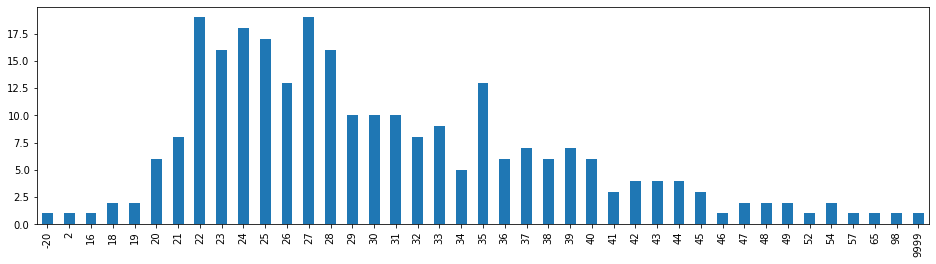

In [ ]:
# นับจำนวนผู้ตอบแบบสอบถามที่อยู่ในแต่ละช่วงอายุ
survey_df['อายุ'].value_counts().sort_index().plot(kind='bar', figsize=(16,4))

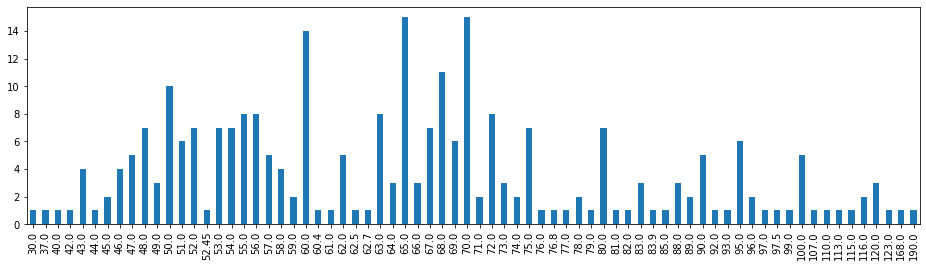

In [ ]:
survey_df['น้ำหนักตัว (กิโลกรัม)'].value_counts().sort_index().plot(kind='bar', figsize=(16,4))

In [ ]:
survey_df['เพศ'].value_counts()

ชาย     157
หญิง     91
         20
Name: เพศ, dtype: int64

In [ ]:
survey_df[['อายุ','น้ำหนักตัว (กิโลกรัม)']].loc[survey_df['เพศ']=='']

,อายุ,น้ำหนักตัว (กิโลกรัม)
0,30,52.45
1,19,52.00
2,34,70.00
3,26,60.00
4,34,63.00
5,27,88.00
6,37,80.00
7,22,37.00
8,28,77.00
9,29,46.00


In [ ]:
from googletrans import Translator
import re

def rename_column(column_names):
  translator = Translator()
  res = []
  name = ''
  for index, value in enumerate(column_names):
    if re.search(r'\[(.*?)\]', value) != None:
      name = re.findall(r'\[(.+)\]', value)[0]
    else:
      name = value

    res.append(translator.translate(name, dest='en').text)
  return res

column_names = survey_df.columns.values
column_names
eng_column_names = rename_column(column_names)
eng_column_names

['Timestamp',
 'green papaya salad',
 'Crispy Pork Basil',
 'Tom Yum Kung',
 'Chicken rice',
 'noodle',
 'Pizza',
 'Bonchon Chicken',
 'MK Suki',
 'Seafood',
 'salad',
 'Boiled pork blood',
 'Durian',
 'age',
 'Body weight (kg)',
 'sex']

In [ ]:
survey_df

,Timestamp,อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ],อาหารที่ชอบ (ตอบทุกข้อ) [กระเพราหมูกรอบ],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มยำกุ้ง],อาหารที่ชอบ (ตอบทุกข้อ) [ข้าวมันไก่],อาหารที่ชอบ (ตอบทุกข้อ) [ก๋วยเตี๋ยว],อาหารที่ชอบ (ตอบทุกข้อ) [พิซซ่า],อาหารที่ชอบ (ตอบทุกข้อ) [ไก่ บอนชอน],อาหารที่ชอบ (ตอบทุกข้อ) [MK สุกี้],อาหารที่ชอบ (ตอบทุกข้อ) [อาหารทะเล],อาหารที่ชอบ (ตอบทุกข้อ) [สลัด],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มเลือดหมู],อาหารที่ชอบ (ตอบทุกข้อ) [ทุเรียน],อายุ,น้ำหนักตัว (กิโลกรัม),เพศ
0,8/20/2020 18:51:29,รักเลย,เฉยๆ,รักเลย,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,รักเลย,รักเลย,เฉยๆ,รักเลย,เฉยๆ,30,52.45,
1,8/20/2020 18:53:38,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,ชอบ,19,52.00,
2,8/20/2020 18:57:27,เฉยๆ,ชอบ,เกลียด,เฉยๆ,เฉยๆ,ชอบ,ชอบ,เฉยๆ,เกลียด,เฉยๆ,เฉยๆ,ชอบ,34,70.00,
3,8/20/2020 18:59:21,รักเลย,ชอบ,เกลียด,เฉยๆ,ชอบ,ชอบ,ชอบ,ชอบ,เกลียด,เฉยๆ,เกลียด,เฉยๆ,26,60.00,
4,8/20/2020 19:10:17,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่ชอบ,ชอบ,34,63.00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,8/22/2020 14:07:18,ชอบ,ชอบ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ชอบ,รักเลย,เฉยๆ,เฉยๆ,เกลียด,30,88.00,ชาย
264,8/22/2020 18:16:05,รักเลย,ชอบ,ชอบ,ชอบ,ชอบ,เกลียด,เกลียด,ชอบ,เฉยๆ,รักเลย,ชอบ,ชอบ,24,56.00,ชาย
265,8/22/2020 22:53:24,รักเลย,ชอบ,ชอบ,ชอบ,ชอบ,เกลียด,เกลียด,ชอบ,เฉยๆ,รักเลย,ชอบ,ชอบ,24,56.00,ชาย
266,8/25/2020 15:41:22,เกลียด,เฉยๆ,ชอบ,เฉยๆ,รักเลย,เฉยๆ,รักเลย,รักเลย,รักเลย,เกลียด,ชอบ,ชอบ,28,54.00,หญิง


In [ ]:
feature_map = {'เกลียด': 1, 'ไม่ชอบ': 2, 'เฉยๆ': 3, 'ชอบ': 4, 'รักเลย': 5}
survey_df['อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ]'].map(feature_map)

0      5
1      4
2      3
3      5
4      3
      ..
263    4
264    5
265    5
266    1
267    5
Name: อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ], Length: 268, dtype: int64

In [ ]:
feature_map = {'เกลียด': 1, 'ไม่ชอบ': 2, 'เฉยๆ': 3, 'ชอบ': 4, 'รักเลย': 5}
temp = survey_df.copy()
for i in range(1,13):
  temp.iloc[:,i] = temp.iloc[:,i].map(feature_map)
temp

,Timestamp,อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ],อาหารที่ชอบ (ตอบทุกข้อ) [กระเพราหมูกรอบ],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มยำกุ้ง],อาหารที่ชอบ (ตอบทุกข้อ) [ข้าวมันไก่],อาหารที่ชอบ (ตอบทุกข้อ) [ก๋วยเตี๋ยว],อาหารที่ชอบ (ตอบทุกข้อ) [พิซซ่า],อาหารที่ชอบ (ตอบทุกข้อ) [ไก่ บอนชอน],อาหารที่ชอบ (ตอบทุกข้อ) [MK สุกี้],อาหารที่ชอบ (ตอบทุกข้อ) [อาหารทะเล],อาหารที่ชอบ (ตอบทุกข้อ) [สลัด],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มเลือดหมู],อาหารที่ชอบ (ตอบทุกข้อ) [ทุเรียน],อายุ,น้ำหนักตัว (กิโลกรัม),เพศ
0,8/20/2020 18:51:29,5,3,5,3,4,3,3,5,5,3,5,3,30,52.45,
1,8/20/2020 18:53:38,4,3,3,3,4,3,4,3,3,3,4,4,19,52.00,
2,8/20/2020 18:57:27,3,4,1,3,3,4,4,3,1,3,3,4,34,70.00,
3,8/20/2020 18:59:21,5,4,1,3,4,4,4,4,1,3,1,3,26,60.00,
4,8/20/2020 19:10:17,3,4,3,3,3,3,4,3,3,3,2,4,34,63.00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,8/22/2020 14:07:18,4,4,3,3,3,3,3,4,5,3,3,1,30,88.00,ชาย
264,8/22/2020 18:16:05,5,4,4,4,4,1,1,4,3,5,4,4,24,56.00,ชาย
265,8/22/2020 22:53:24,5,4,4,4,4,1,1,4,3,5,4,4,24,56.00,ชาย
266,8/25/2020 15:41:22,1,3,4,3,5,3,5,5,5,1,4,4,28,54.00,หญิง


In [ ]:
gender_map = {'ชาย': 'male', 'หญิง': 'female'}
temp['เพศ'] = temp['เพศ'].map(gender_map)
temp

,Timestamp,อาหารที่ชอบ (ตอบทุกข้อ) [ส้มตำ],อาหารที่ชอบ (ตอบทุกข้อ) [กระเพราหมูกรอบ],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มยำกุ้ง],อาหารที่ชอบ (ตอบทุกข้อ) [ข้าวมันไก่],อาหารที่ชอบ (ตอบทุกข้อ) [ก๋วยเตี๋ยว],อาหารที่ชอบ (ตอบทุกข้อ) [พิซซ่า],อาหารที่ชอบ (ตอบทุกข้อ) [ไก่ บอนชอน],อาหารที่ชอบ (ตอบทุกข้อ) [MK สุกี้],อาหารที่ชอบ (ตอบทุกข้อ) [อาหารทะเล],อาหารที่ชอบ (ตอบทุกข้อ) [สลัด],อาหารที่ชอบ (ตอบทุกข้อ) [ต้มเลือดหมู],อาหารที่ชอบ (ตอบทุกข้อ) [ทุเรียน],อายุ,น้ำหนักตัว (กิโลกรัม),เพศ
0,8/20/2020 18:51:29,5,3,5,3,4,3,3,5,5,3,5,3,30,52.45,NaN
1,8/20/2020 18:53:38,4,3,3,3,4,3,4,3,3,3,4,4,19,52.00,NaN
2,8/20/2020 18:57:27,3,4,1,3,3,4,4,3,1,3,3,4,34,70.00,NaN
3,8/20/2020 18:59:21,5,4,1,3,4,4,4,4,1,3,1,3,26,60.00,NaN
4,8/20/2020 19:10:17,3,4,3,3,3,3,4,3,3,3,2,4,34,63.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,8/22/2020 14:07:18,4,4,3,3,3,3,3,4,5,3,3,1,30,88.00,male
264,8/22/2020 18:16:05,5,4,4,4,4,1,1,4,3,5,4,4,24,56.00,male
265,8/22/2020 22:53:24,5,4,4,4,4,1,1,4,3,5,4,4,24,56.00,male
266,8/25/2020 15:41:22,1,3,4,3,5,3,5,5,5,1,4,4,28,54.00,female


In [ ]:
def clean_data(df):
  clean_df = df.copy()
  clean_df = clean_df.drop('Timestamp', axis=1)

  # convert column to english
  column_names = clean_df.columns.values
  eng_column_names = rename_column(column_names)
  clean_df.columns = eng_column_names

  feature_map = {'เกลียด': 1, 'ไม่ชอบ': 2, 'เฉยๆ': 3, 'ชอบ': 4, 'รักเลย': 5}
  for i in range(12):
    clean_df.iloc[:,i] = clean_df.iloc[:,i].map(feature_map)

  gender_map = {'ชาย': 'male', 'หญิง': 'female'}
  clean_df['sex'] = clean_df['sex'].map(gender_map)

  clean_df = clean_df[(15 < clean_df['age']) & (clean_df['age'] < 70)]

  clean_df['sex'][(clean_df['sex'].isnull()) & (clean_df['Body weight (kg)'] < 60)] = 'female'
  clean_df['sex'][(clean_df['sex'].isnull()) & (clean_df['Body weight (kg)'] >= 60)] = 'male'

  return clean_df

In [ ]:
clean_df = clean_data(survey_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
clean_df['sex'].value_counts()

male      166
female     98
Name: sex, dtype: int64

In [ ]:
clean_df.head()

,green papaya salad,Crispy Pork Basil,Tom Yum Kung,Chicken rice,noodle,Pizza,Bonchon Chicken,MK Suki,Seafood,salad,Boiled pork blood,Durian,age,Body weight (kg),sex
0,5,3,5,3,4,3,3,5,5,3,5,3,30,52.45,female
1,4,3,3,3,4,3,4,3,3,3,4,4,19,52.00,female
2,3,4,1,3,3,4,4,3,1,3,3,4,34,70.00,male
3,5,4,1,3,4,4,4,4,1,3,1,3,26,60.00,male
4,3,4,3,3,3,3,4,3,3,3,2,4,34,63.00,male


In [ ]:
clean_df.isna().sum()

green papaya salad    0
Crispy Pork Basil     0
Tom Yum Kung          0
Chicken rice          0
noodle                0
Pizza                 0
Bonchon Chicken       0
MK Suki               0
Seafood               0
salad                 0
Boiled pork blood     0
Durian                0
age                   0
Body weight (kg)      0
sex                   0
dtype: int64

# 3. Train & Test split
เป็นการแบ่งข้อมูลออกเป็น 2 sets เพื่อใช้ในการ training และ evaluating

In [ ]:
from sklearn.model_selection import train_test_split

def split_train_test(df):
  train_df, test_df = train_test_split(df, test_size=0.2, random_state=2020, shuffle=True)
  return train_df, test_df

In [ ]:
train_df, test_df = split_train_test(clean_df)

In [ ]:
len(train_df)

211

In [ ]:
len(test_df)

53

# 4. Extract Feature
แยกข้อมูล feature และ label ออกมากจาก traing set และ test set 

เพื่อให้โมเดลเรียนรู้ได้ และนำมาวัดผลประสิทธิภาพของโมเดลได้

In [ ]:
train_df

,green papaya salad,Crispy Pork Basil,Tom Yum Kung,Chicken rice,noodle,Pizza,Bonchon Chicken,MK Suki,Seafood,salad,Boiled pork blood,Durian,age,Body weight (kg),sex
218,4,2,2,4,3,5,4,4,4,3,4,1,16,47.0,male
194,4,4,4,3,3,3,4,4,4,4,3,4,35,70.0,male
2,3,4,1,3,3,4,4,3,1,3,3,4,34,70.0,male
57,3,5,3,3,3,3,2,4,4,3,3,4,34,58.0,female
212,4,2,2,3,3,3,5,4,5,3,4,3,20,60.0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,4,4,3,4,4,2,1,2,3,3,3,1,23,50.0,male
126,1,2,2,3,4,5,4,5,3,3,3,1,35,63.0,male
92,4,5,3,4,4,3,4,3,5,2,2,1,28,61.0,male
197,1,2,2,4,5,5,5,5,3,1,2,1,18,55.0,male


In [ ]:
pd.get_dummies(train_df['sex'])

,female,male
218,0,1
194,0,1
2,0,1
57,1,0
212,1,0
...,...,...
132,0,1
126,0,1
92,0,1
197,0,1


In [ ]:
def extract_feature(df):
  feat = df.copy().dropna()

  dummies_df = pd.get_dummies(feat['sex'])
  feat = pd.concat([feat,dummies_df],axis=1)
  # feat = feat.drop('sex',axis=1)

  label = feat['Body weight (kg)']
  feat = feat.drop(['Body weight (kg)','sex'], axis=1)
  return feat, label

In [ ]:
train_feat, train_label = extract_feature(train_df)
test_feat, test_label = extract_feature(test_df)

In [ ]:
train_label

218    47.0
194    70.0
2      70.0
57     58.0
212    60.0
       ... 
132    50.0
126    63.0
92     61.0
197    55.0
119    51.0
Name: Body weight (kg), Length: 211, dtype: float64

# 5. Train Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree

In [ ]:
def train_model(feat, label):
  # random forrest
  # model = RandomForestRegressor(max_depth=1000, random_state=2020)
  
  # Gradient Boosting
  model = GradientBoostingRegressor(random_state=2020)

  # Decision Tree
  # model = tree.DecisionTreeRegressor(max_depth=1000, random_state=2020)
  
  model.fit(feat, label)
  return model

In [ ]:
model = train_model(train_feat, train_label)

In [ ]:
for x, y in zip(train_feat.columns.values, model.feature_importances_):
  print(x,'\t', y)

green papaya salad 	 0.12388546730931188
Crispy Pork Basil 	 0.06729836852248941
Tom Yum Kung 	 0.03494561574100172
Chicken rice 	 0.03456160666871446
noodle 	 0.029944218865119717
Pizza 	 0.043822364115835545
Bonchon Chicken 	 0.05338072790934108
MK Suki 	 0.06954654436739678
Seafood 	 0.054430981566186684
salad 	 0.070719381803169
Boiled pork blood 	 0.05770072473763693
Durian 	 0.04332552164985492
age 	 0.18025582450245764
female 	 0.08130021225814653
male 	 0.05488243998333766


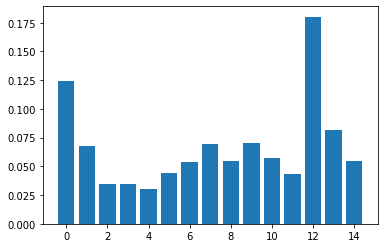

In [ ]:
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
x = [1,2,3]
y = ['a','b','c']
for i,j in zip(x,y):
  print(i,j)

1 a
2 b
3 c


# 6. Evaluation

การวัดผลในงาน regression แตกต่างกับ classification โดยสิ้นเชิง

classification วัดผลด้วย accuracy, precision, recall, f-score

regression วัดผลด้วย mse, rmse, r2, mae เป็นต้น

In [ ]:
predict = model.predict(test_feat)

In [ ]:
0 dog, 1 cat, 2 rabbit

predict: 1, 1, 2, 0, 2, 0
answer:  0, 1, 2, 0, 1, 2

0, 1, 1, 1, 0, 0 = 50%

19
12

array([ 60.2   ,  60.365 , 113.319 ,  79.04  ,  57.4745,  66.353 ,
        73.855 ,  71.99  ,  80.314 ,  60.4595,  69.325 ,  73.976 ,
        63.013 ,  81.899 ,  60.41  ,  64.707 ,  80.3   ,  78.83  ,
        79.608 ,  63.8045,  56.53  ,  71.82  ,  80.115 ,  70.3   ,
        71.118 ,  53.84  ,  65.495 , 104.84  ,  64.484 ,  59.6   ,
        52.019 ,  56.82  ,  95.872 ,  60.2145,  76.77  ,  65.4395,
        74.07  ,  61.61  ,  57.8   ,  68.049 ,  80.36  ,  78.57  ,
        80.87  ,  61.265 ,  71.878 ,  79.77  ,  63.194 ,  81.34  ,
        75.768 ,  82.717 ,  49.996 ,  56.6295,  82.059 ])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def eval_rmse(predict, actual):
  return np.sqrt(mean_squared_error(predict, actual))

def eval_r2(predict, actual):
  return r2_score(predict, actual)

In [ ]:
def rmse(predict,test_label):
  diff = predict - test_label
  return np.sqrt(sum(diff**2)/len(diff))

In [ ]:
eval_rmse(predict, test_label)

18.10382148884594

In [ ]:
eval_r2(predict, test_label)

-1.1175564989261146

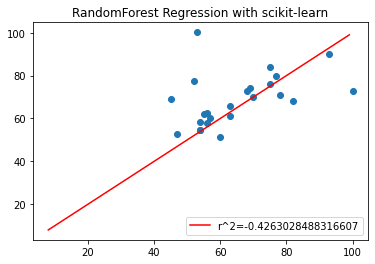

In [ ]:
import matplotlib.pyplot as plt

r2 = eval_r2(predict, test_label)

plt.scatter(test_label, predict)
plt.plot(np.arange(8, 100), np.arange(8, 100), label="r^2=" + str(r2), c="r")
plt.legend(loc="lower right")
plt.title("Regression with scikit-learn")
plt.show()

ลองเล่นกับ model ถามเพื่อนข้างๆแล้วมาดูกันว่าแม่นยำแค่ไหน

In [ ]:
train_feat.columns.values

array(['green papaya salad', 'Crispy Pork Basil', 'Tom Yum Kung',
       'Chicken rice', 'noodle', 'Pizza', 'Bonchon Chicken', 'MK Suki',
       'Seafood', 'salad', 'Boiled pork blood', 'Durian', 'age', 'female',
       'male'], dtype=object)

In [ ]:
model.predict(pd.DataFrame([[3,4,5,2,4,3,3,4,5,2,4,3,45,0,1]]))

array([72.92])

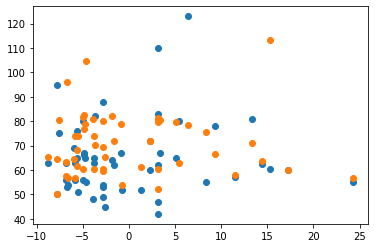

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca=PCA(n_components=1)
test_pca=pca.fit_transform(test_feat)

plt.scatter(test_pca, test_label)
plt.scatter(test_pca, predict)

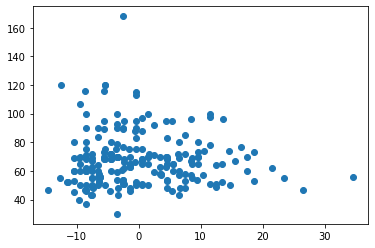

In [ ]:
pca=PCA(n_components=1) 
train_pca=pca.fit_transform(train_feat)

plt.scatter(train_pca, train_label)

# Pipeline
ต่อทุกอย่างเข้าด้วยกับ ให้เป็น pipeline

In [ ]:
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
from oauth2client.client import GoogleCredentials

def pipeline():
  # get data
  survey_df = load_data()

  # clean data
  clean_df = clean_data(survey_df)

  # train & test split
  train_df, test_df = split_train_test(clean_df)

  # extract feature
  train_feat, train_label = extract_feature(train_df)
  test_feat, test_label = extract_feature(test_df)

  train = train_feat.iloc[:len(train_feat)//2,:]
  label = train_label.iloc[:len(train_feat)//2]
  # Train model
  model = train_model(train, label)

  # eveluation
  predict = model.predict(test_feat)
  print(eval_rmse(predict, test_label))

In [ ]:
train = train_feat.iloc[:len(train_feat)//2,:]

In [ ]:
pipeline()

24.34697323695167


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
from sklearn import preprocessing

def norm(df):
  norm_df = df.copy()
  temp = norm_df[['Body weight (kg)','sex']]
  
  norm_df = norm_df.drop(['Body weight (kg)','sex'],axis=1)

  columns = norm_df.columns.values

  x = norm_df.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  norm_df = pd.DataFrame(x_scaled)

  norm_df.columns = columns
  print(len(temp))
  # norm_df[['Body weight (kg)','sex']] = norm_df
  norm_df = pd.concat([norm_df, temp], axis=1)
  return norm_df
norm_df = norm(clean_df)

232


# Addition

K-FOLD Cross validation

In [ ]:
from sklearn.model_selection import KFold

def pipeline():
  # get data
  survey_df = load_data()

  # clean data
  clean_df = clean_data(survey_df)

  # train & test split
  # train_df, test_df = split_train_test(clean_df)

  # define number of folds
  kf = KFold(n_splits=5)
  kf.get_n_splits(clean_df)

  error = []
  for train_index, test_index in kf.split(clean_df):

    # extract feature
    train_df = clean_df.iloc[train_index]
    test_df = clean_df.iloc[test_index]

    train_feat, train_label = extract_feature(train_df)
    test_feat, test_label = extract_feature(test_df)

    # Train model
    model = train_model(train_feat, train_label)

    # eveluation
    predict = model.predict(test_feat)
    error.append(eval_rmse(predict, test_label))
  print('Error: ',sum(error)/len(error))

In [ ]:
pipeline()

Error:  27.54843891225737


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=1000, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2020, verbose=0, warm_start=False)

In [ ]:
import pickle
filename = 'test.p'
pickle.dump(model, open(filename,'wb'))